## Investigation of triggered seismicity near Geysers Geothermal field due to M8.2 Chignik Earthquake.

Author - Akash Kharita, Final year Geophysics student, Indian Institution of Technology Roorkee,
29 August, 2021 <br>
Licence - Creative Commons Attribution 4.0 (CC-BY) - https://creativecommons.org/licenses/ <br>
You are allowed to share and use the information here as long as you give the appropriate credit.<br>


#### Coso volcanic field is located at the western side of Basin and Range province. it produces dozens of tremors every week, sometimes tremors occur every minute.<br>

In this jupyter notebook, I will try to investigate the effect of M8.2 Chignik earthquake near Geysers, I will do the following steps - 

1) Download all the available waveform data within 1 degree radius from Coso <br>
2) Rotating the waveforms <br>
3) Observing the filtered waveforms(2-8Hz) and Unfiltered waveforms, selecting the good quality waveforms. <br>
4) Checking for correspondence between surface wave arrival and locally triggered earthquakes. <br>
5) Checking the available event catalog to see the rates of earthquakes swarms before and after the event and also checking for the delayed response. 

In [4]:
## Importing necessary dependencies
import obspy
from obspy import UTCDateTime
from obspy.clients.fdsn import Client
import matplotlib.pyplot as plt 
import numpy as np
import pandas as pd
from glob import glob
import os
import matplotlib as mpl
import cartopy.crs as ccrs
import cartopy.io.img_tiles as cimgt
import warnings 
warnings.filterwarnings('ignore')

In [1]:
lat,lon = 36.03, -117.82

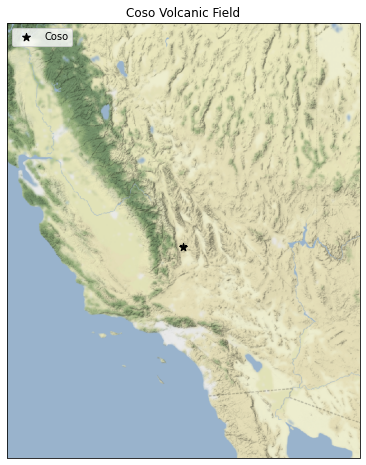

In [3]:
#%matplotlib notebook
fig = plt.figure(figsize=[8,8])
ax = plt.axes(projection = ccrs.Mercator())
ax.set_extent([lon-5,lon+5,lat-5,lat+5])
#ax.coastlines(resolution='10m')
stamen_terrain = cimgt.Stamen('terrain-background') ##maps.stamen.com
ax.add_image(stamen_terrain,7)
plt.scatter(lon,lat,c='black',marker='*',transform=ccrs.PlateCarree(),label='Coso',s=70)
plt.title('Coso Volcanic Field')
plt.legend(loc='upper left')
plt.show()

## 1) Downloading the waveforms

Obspy's mass downloader downloads the events from all the available datacentres

In [6]:
import obspy
from obspy.clients.fdsn.mass_downloader import CircularDomain, \
    Restrictions, MassDownloader

origin_time = obspy.UTCDateTime(2021, 7, 29, 6, 15, 49)

# Circular domain around the epicenter. This will download all data between
# 70 and 90 degrees distance from the epicenter. This module also offers
# rectangular and global domains. More complex domains can be defined by
# inheriting from the Domain class.
domain = CircularDomain(latitude=lat, longitude= lon,
                        minradius=0.0, maxradius=1.0)

restrictions = Restrictions(
    # Get data from 5 minutes before the event to one hour after the
    # event. This defines the temporal bounds of the waveform data.
    starttime=origin_time - 0 * 60,
    endtime=origin_time + 3600,
    # You might not want to deal with gaps in the data. If this setting is
    # True, any trace with a gap/overlap will be discarded.
    reject_channels_with_gaps=True,
    # And you might only want waveforms that have data for at least 95 % of
    # the requested time span. Any trace that is shorter than 95 % of the
    # desired total duration will be discarded.
    minimum_length=0.95,
    # No two stations should be closer than 10 km to each other. This is
    # useful to for example filter out stations that are part of different
    # networks but at the same physical station. Settings this option to
    # zero or None will disable that filtering.
    minimum_interstation_distance_in_m=1E3,
    # Only HH or BH channels. If a station has HH channels, those will be
    # downloaded, otherwise the BH. Nothing will be downloaded if it has
    # neither. You can add more/less patterns if you like.
    channel_priorities=["HH[NE]", "BH[NE]"],
    # Location codes are arbitrary and there is no rule as to which
    # location is best. Same logic as for the previous setting.
    location_priorities=["", "00", "10"])

# No specified providers will result in all known ones being queried.
mdl = MassDownloader()
# The data will be downloaded to the ``./waveforms/`` and ``./stations/``
# folders with automatically chosen file names.
mdl.download(domain, restrictions, mseed_storage="waveforms_coso",
             stationxml_storage="stations_coso")

[2021-08-27 10:35:31,930] - obspy.clients.fdsn.mass_downloader - INFO: Initializing FDSN client(s) for BGR, EMSC, ETH, GEONET, GFZ, ICGC, INGV, IPGP, ISC, KNMI, KOERI, LMU, NCEDC, NIEP, NOA, RESIF, SCEDC, TEXNET, UIB-NORSAR, USGS, USP, ORFEUS, IRIS.
[2021-08-27 10:35:38,666] - obspy.clients.fdsn.mass_downloader - INFO: Cannot use client 'ISC' as it does not have 'dataselect' and/or 'station' services.
[2021-08-27 10:35:41,533] - obspy.clients.fdsn.mass_downloader - INFO: Cannot use client 'EMSC' as it does not have 'dataselect' and/or 'station' services.
[2021-08-27 10:35:41,654] - obspy.clients.fdsn.mass_downloader - INFO: Cannot use client 'USGS' as it does not have 'dataselect' and/or 'station' services.
[2021-08-27 10:35:41,656] - obspy.clients.fdsn.mass_downloader - INFO: Successfully initialized 20 client(s): BGR, ETH, GEONET, GFZ, ICGC, INGV, IPGP, KNMI, KOERI, LMU, NCEDC, NIEP, NOA, RESIF, SCEDC, TEXNET, UIB-NORSAR, USP, ORFEUS, IRIS.
[2021-08-27 10:35:41,669] - obspy.clients.f

[2021-08-27 10:37:05,419] - obspy.clients.fdsn.mass_downloader - INFO: Client 'NCEDC' - Successfully downloaded 'stations_coso/CI.LRL.xml'.
[2021-08-27 10:37:05,537] - obspy.clients.fdsn.mass_downloader - INFO: Client 'NCEDC' - Successfully downloaded 'stations_coso/CI.SRT.xml'.
[2021-08-27 10:37:08,005] - obspy.clients.fdsn.mass_downloader - INFO: Client 'NCEDC' - Successfully downloaded 'stations_coso/CI.SPG2.xml'.
[2021-08-27 10:37:08,177] - obspy.clients.fdsn.mass_downloader - INFO: Client 'NCEDC' - Successfully downloaded 'stations_coso/CI.MPM.xml'.
[2021-08-27 10:37:08,332] - obspy.clients.fdsn.mass_downloader - INFO: Client 'NCEDC' - Successfully downloaded 'stations_coso/CI.WAS2.xml'.
[2021-08-27 10:37:10,718] - obspy.clients.fdsn.mass_downloader - INFO: Client 'NCEDC' - Successfully downloaded 'stations_coso/CI.WCS2.xml'.
[2021-08-27 10:37:11,068] - obspy.clients.fdsn.mass_downloader - INFO: Client 'NCEDC' - Successfully downloaded 'stations_coso/CI.WOR.xml'.
[2021-08-27 10:37

[2021-08-27 10:38:48,539] - obspy.clients.fdsn.mass_downloader - INFO: Client 'IRIS' - Requesting reliable availability.
[2021-08-27 10:39:17,500] - obspy.clients.fdsn.mass_downloader - INFO: Client 'IRIS' - Successfully requested availability (28.96 seconds)
[2021-08-27 10:39:17,605] - obspy.clients.fdsn.mass_downloader - INFO: Client 'IRIS' - Found 7 stations (14 channels).
[2021-08-27 10:39:17,608] - obspy.clients.fdsn.mass_downloader - INFO: Client 'IRIS' - Will attempt to download data from 1 stations.
[2021-08-27 10:39:17,609] - obspy.clients.fdsn.mass_downloader - INFO: Client 'IRIS' - Status for 2 time intervals/channels before downloading: NEEDS_DOWNLOADING
[2021-08-27 10:39:18,824] - obspy.clients.fdsn.mass_downloader - INFO: Client 'IRIS' - No data available for request.
[2021-08-27 10:39:18,825] - obspy.clients.fdsn.mass_downloader - INFO: Client 'IRIS' - Launching basic QC checks...
[2021-08-27 10:39:18,827] - obspy.clients.fdsn.mass_downloader - INFO: Client 'IRIS' - Down

{'BGR': <obspy.clients.fdsn.mass_downloader.download_helpers.ClientDownloadHelper at 0x7f69580efc70>,
 'ETH': <obspy.clients.fdsn.mass_downloader.download_helpers.ClientDownloadHelper at 0x7f6995736c40>,
 'GEONET': <obspy.clients.fdsn.mass_downloader.download_helpers.ClientDownloadHelper at 0x7f6995736520>,
 'GFZ': <obspy.clients.fdsn.mass_downloader.download_helpers.ClientDownloadHelper at 0x7f694b3b5fd0>,
 'ICGC': <obspy.clients.fdsn.mass_downloader.download_helpers.ClientDownloadHelper at 0x7f6994dfcfa0>,
 'INGV': <obspy.clients.fdsn.mass_downloader.download_helpers.ClientDownloadHelper at 0x7f6994dfcf40>,
 'IPGP': <obspy.clients.fdsn.mass_downloader.download_helpers.ClientDownloadHelper at 0x7f6994dfcfd0>,
 'KNMI': <obspy.clients.fdsn.mass_downloader.download_helpers.ClientDownloadHelper at 0x7f6994dfcf70>,
 'KOERI': <obspy.clients.fdsn.mass_downloader.download_helpers.ClientDownloadHelper at 0x7f69948193d0>,
 'LMU': <obspy.clients.fdsn.mass_downloader.download_helpers.ClientDownlo

### Loading the event waveforms and station information

In [28]:
sfiles = os.listdir('waveforms_coso')
s = []
for i in range(len(sfiles)):
    s += obspy.read('waveforms_coso//'+sfiles[i])

s = obspy.Stream(s)

In [29]:
sfiles = os.listdir('stations_coso')
inv = []
for i in range(len(sfiles)):
    inv += obspy.read_inventory('stations_coso//'+sfiles[i])

inv = obspy.Inventory(inv)

In [30]:
s_north = s.select(channel='*HN')
s_east = s.select(channel='*HE')
s_z = s.select(channel='*HZ')
stn_lats = []
stn_lons = []
stns = []
for i in range(len(inv)):
    stn_lats.append(inv[i][0][0].latitude)
    stn_lons.append(inv[i][0][0].longitude)
    stns.append(s_north[i].stats.station)

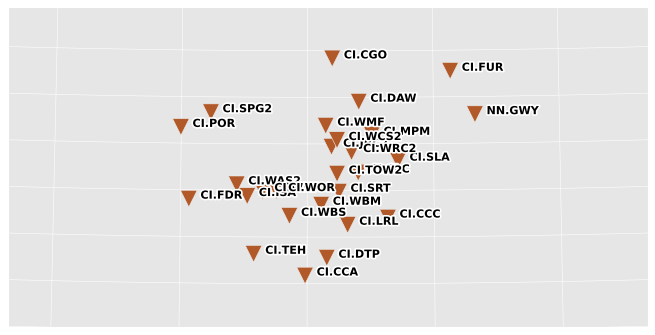

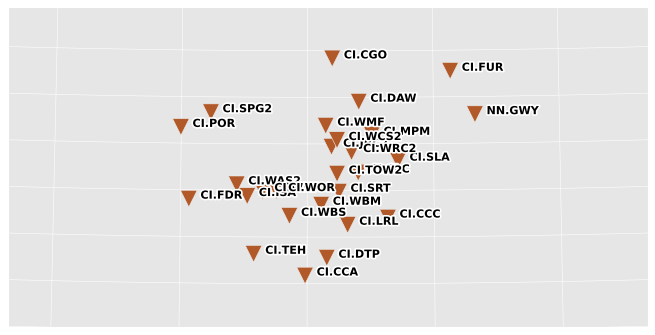

In [31]:
plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = 10,5
inv.plot(projection='local',resolution="f",show=False)

### Rotating the waveforms

In [32]:
stn_lats = []
stn_lons = []
stns = []
for i in range(len(inv)):
    stn_lats.append(inv[i][0][0].latitude)
    stn_lons.append(inv[i][0][0].longitude)
    stns.append(s_north[i].stats.station)


In [33]:
from obspy.geodetics import gps2dist_azimuth
dist  = []
ba = []
lat_eq,lon_eq = 55.474, -157.917
for i in range(len(stn_lats)):
    b = gps2dist_azimuth(stn_lats[i],stn_lons[i],lat_eq,lon_eq)
    dist.append(b[0])
    ba.append(b[1])

In [34]:
s_rotate = []
for i in range(len(stns)):
    AC = s.select(station=stns[i]) 
    s_rotate += AC.rotate(method='NE->RT',back_azimuth=ba[i])
s_rotate = obspy.Stream(s_rotate)
s_T = s_rotate.select(channel='*HT')
s_R = s_rotate.select(channel='*HR')

In [35]:
import numpy as np
s_t = s_T.copy()
t = np.linspace(0,3600,len(s_t[0].data))
s_t.trim(starttime = s_t[0].stats.starttime+t[np.argmax(s_t[0].data)]-10*60,endtime = s_t[0].stats.starttime+t[np.argmax(s_t[0].data)]+15*60)
s_t_f = s_t.copy()
s_t_f.filter(type='bandpass',freqmin=2,freqmax=8)

27 Trace(s) in Stream:

CI.CCA..HHT | 2021-07-29T06:22:28.798300Z - 2021-07-29T06:47:28.798300Z | 100.0 Hz, 150001 samples
...
(25 other traces)
...
NN.GWY..HHT | 2021-07-29T06:22:28.798300Z - 2021-07-29T06:47:28.798300Z | 100.0 Hz, 150001 samples

[Use "print(Stream.__str__(extended=True))" to print all Traces]

In [36]:
s_r = s_R.copy()
t = np.linspace(0,3600,len(s_r[0].data))
s_r.trim(starttime = s_r[0].stats.starttime+t[np.argmax(s_r[0].data)]-10*60,endtime = s_r[0].stats.starttime+t[np.argmax(s_r[0].data)]+15*60)
s_r_f = s_r.copy()
s_r_f.filter(type='bandpass',freqmin=2,freqmax=8)

27 Trace(s) in Stream:

CI.CCA..HHR | 2021-07-29T06:25:03.708300Z - 2021-07-29T06:50:03.708300Z | 100.0 Hz, 150001 samples
...
(25 other traces)
...
NN.GWY..HHR | 2021-07-29T06:25:03.708300Z - 2021-07-29T06:50:03.708300Z | 100.0 Hz, 150001 samples

[Use "print(Stream.__str__(extended=True))" to print all Traces]

### 3) Plotting the filtered and unfiltered waveforms to look for correspondence between surface waves and locally triggered earthquakes and to select the best quality data


#### Plotting Transverse component

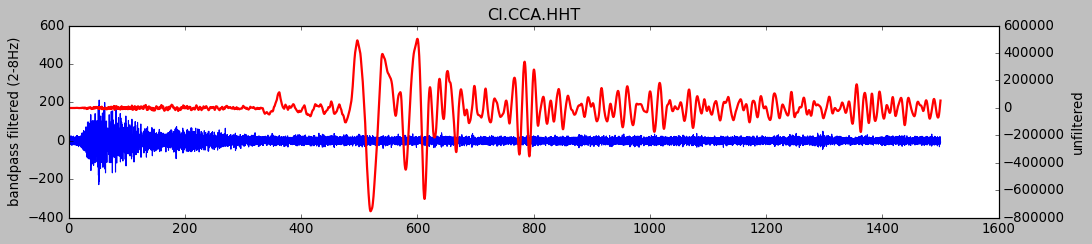

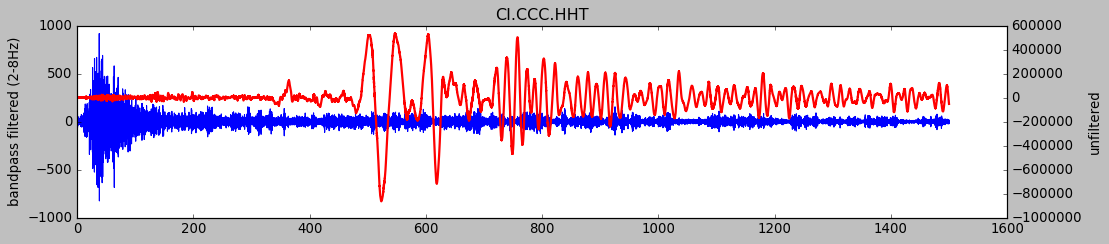

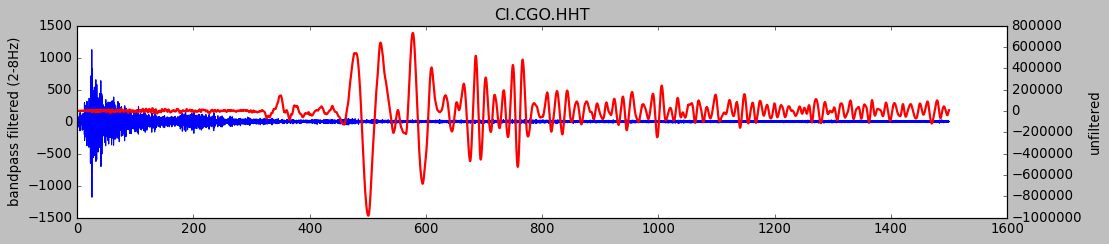

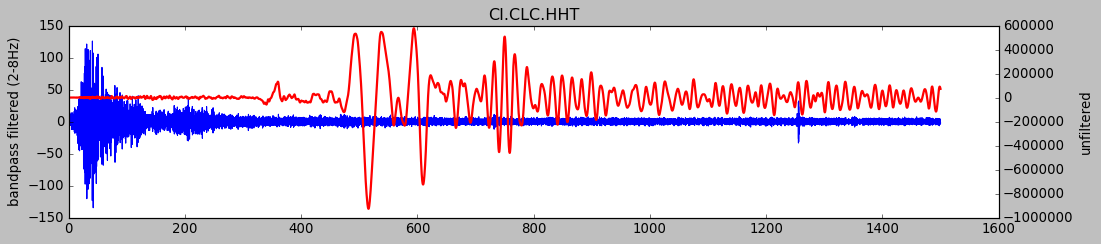

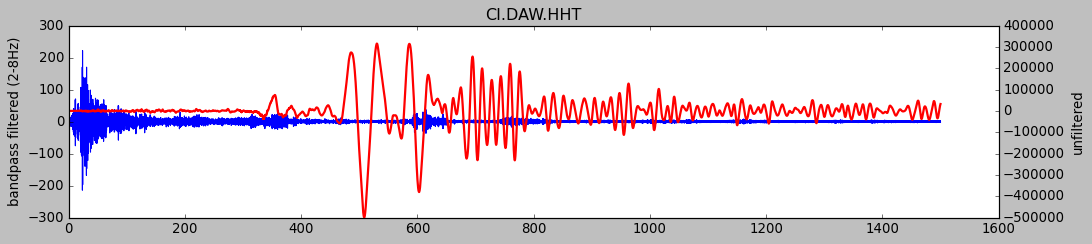

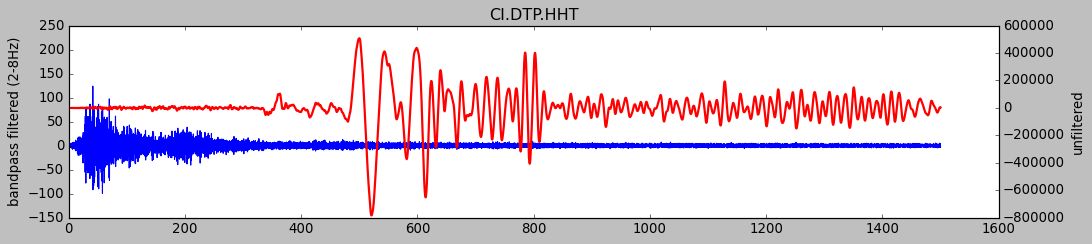

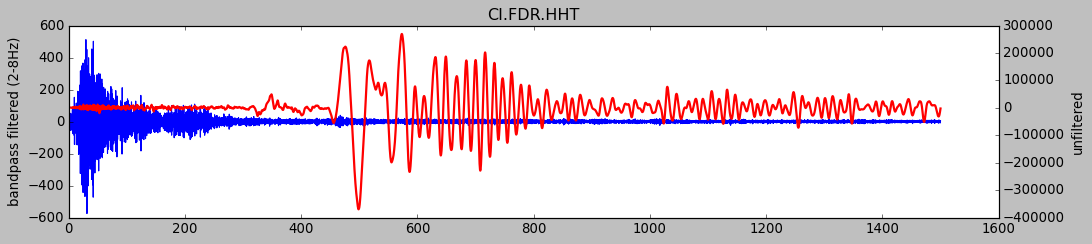

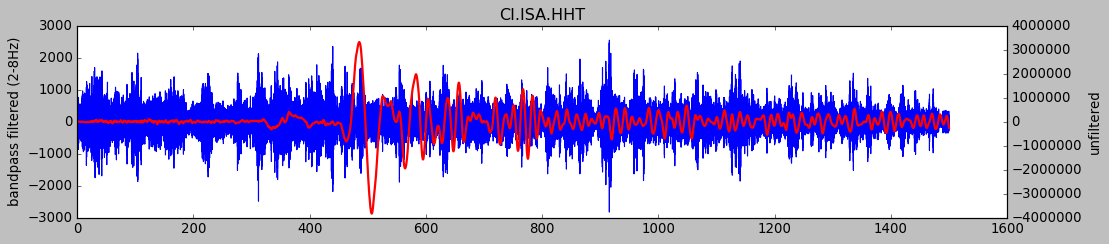

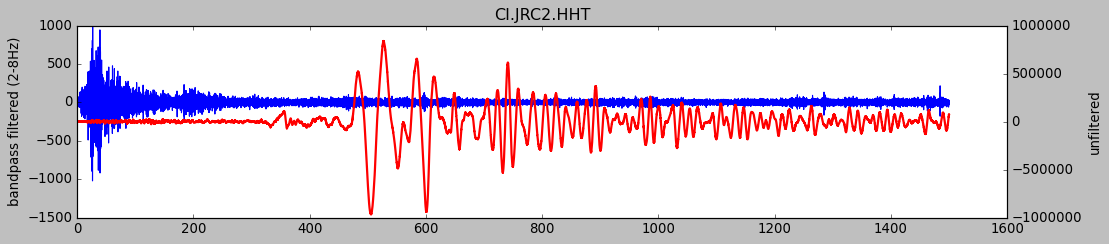

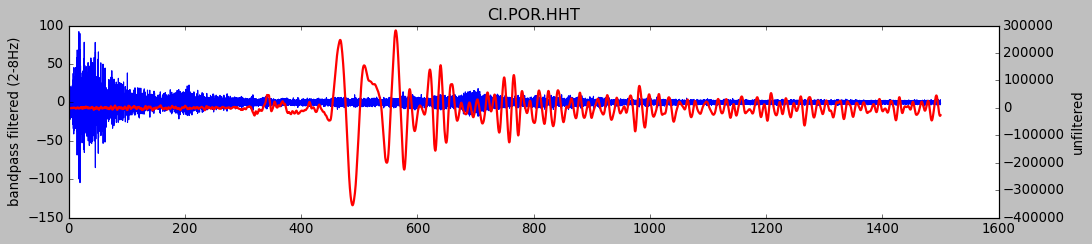

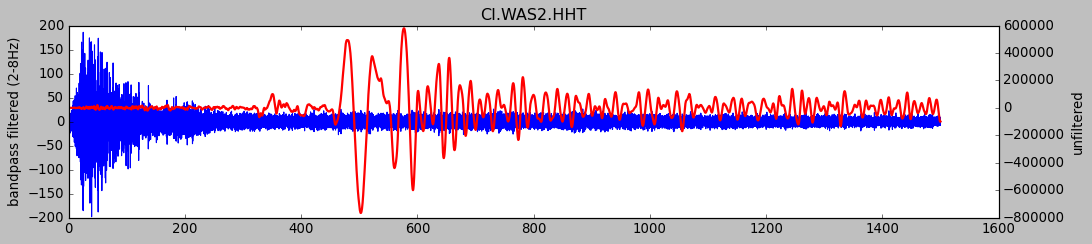

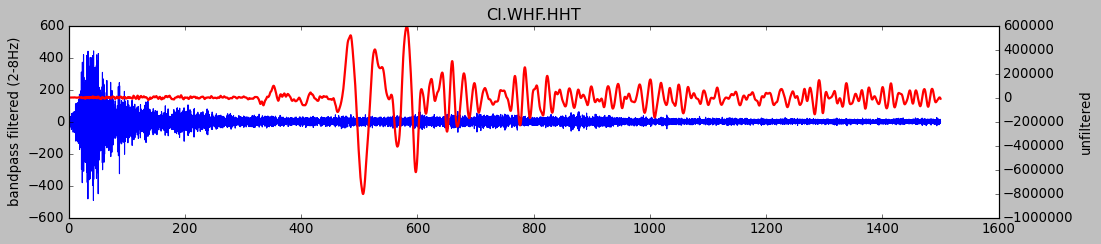

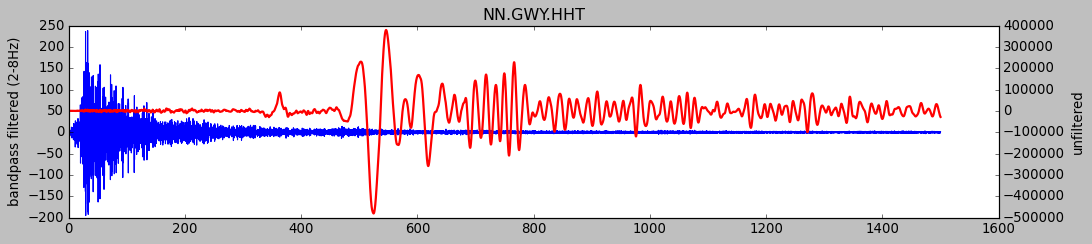

In [37]:
plt.style.use('classic')
for i in range(len(s_t)):
    fig = plt.figure(figsize=[15,3])
    ax1 = fig.add_subplot(111)
    t = np.linspace(0,len(s_t[i].data)*s_t[i].stats.delta,len(s_t[i].data))
    ax1.plot(t,s_t_f[i].data)
    ax1.set_ylabel('bandpass filtered (2-8Hz)')
    #ax1.set_xlim(0,t[-1])
    ax2 = ax1.twinx()
    ax2.plot(t,s_t[i],'r-',label='unfiltered',LineWidth=2)
    ax2.set_ylabel('unfiltered')
    #ax2.set_xlim(700,1200)
    plt.title(s_t[i].stats.network+'.'+s_t[i].stats.station+'.'+s_t[i].stats.channel)

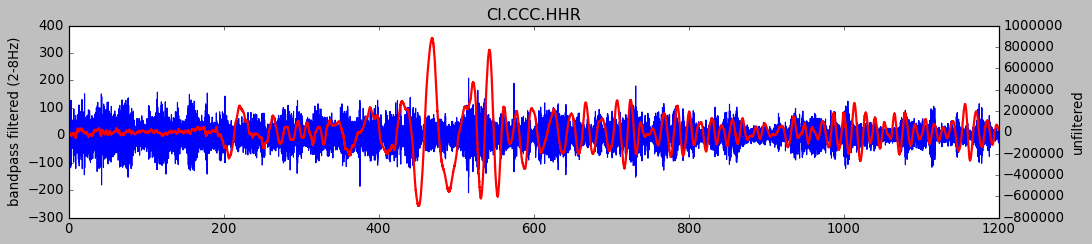

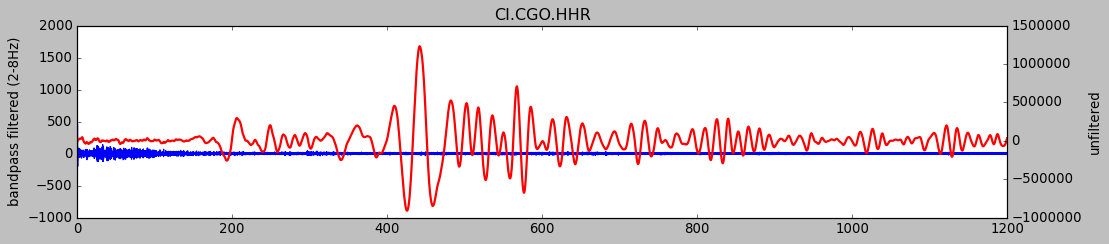

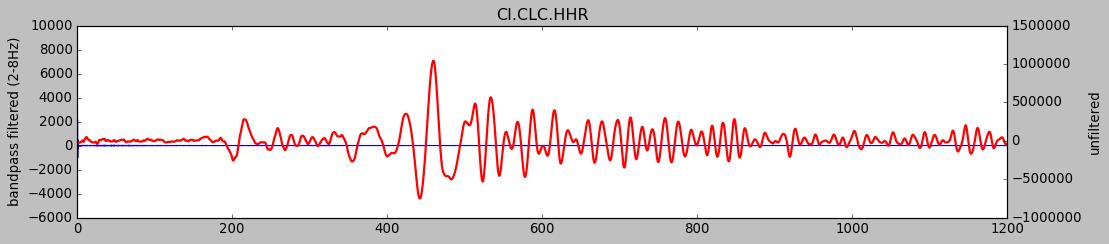

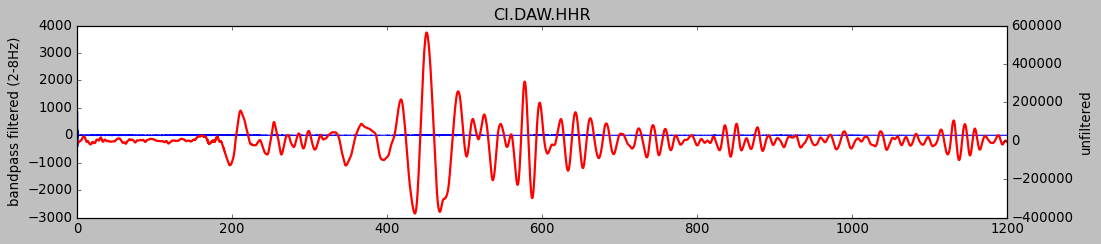

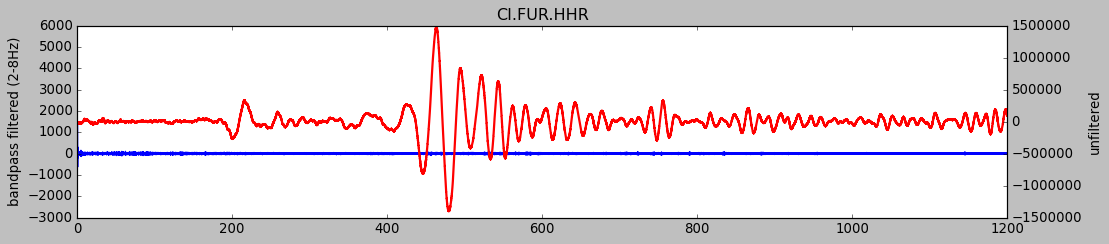

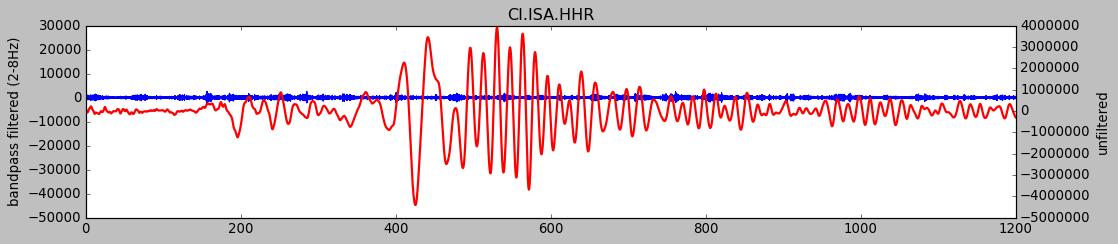

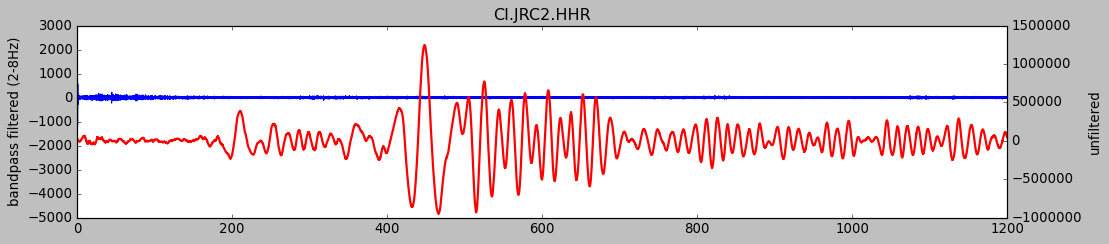

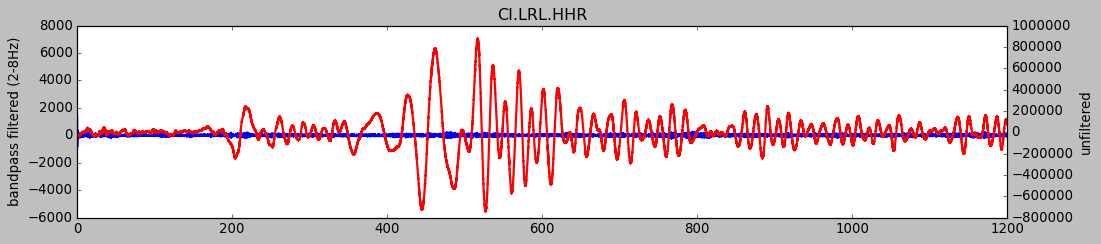

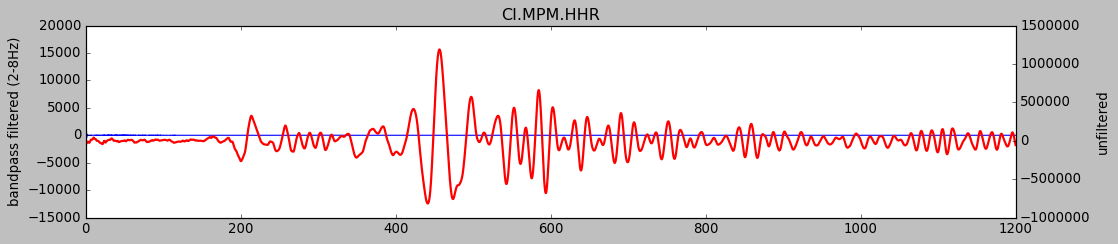

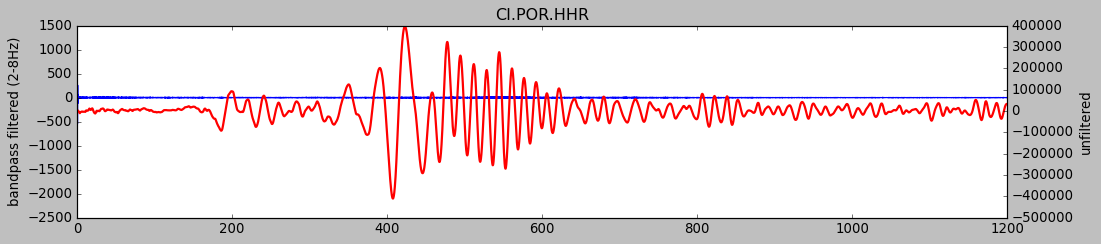

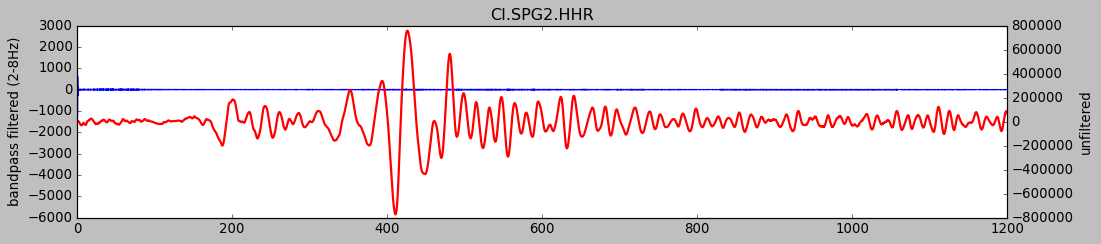

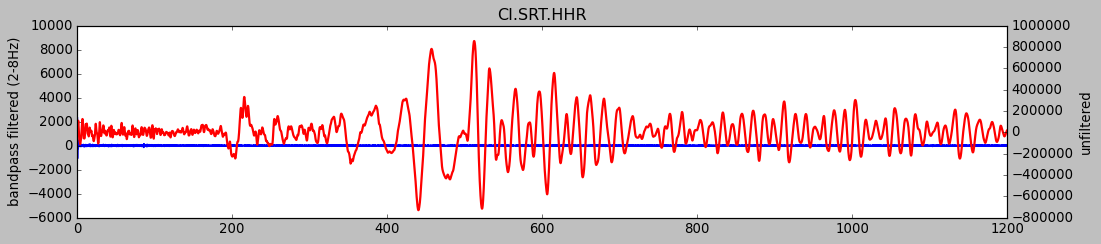

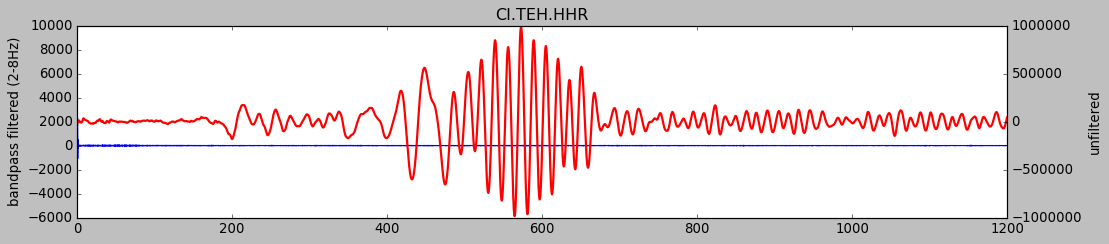

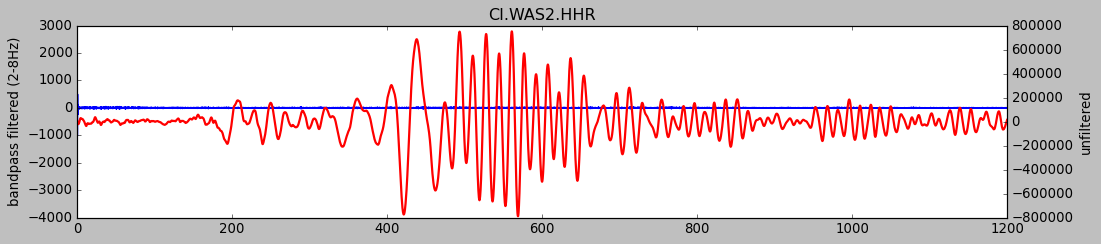

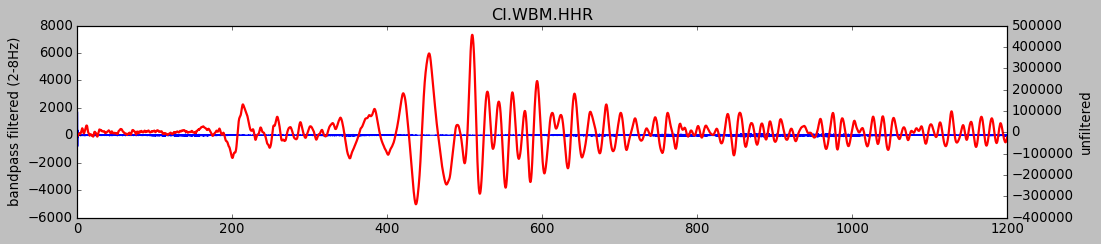

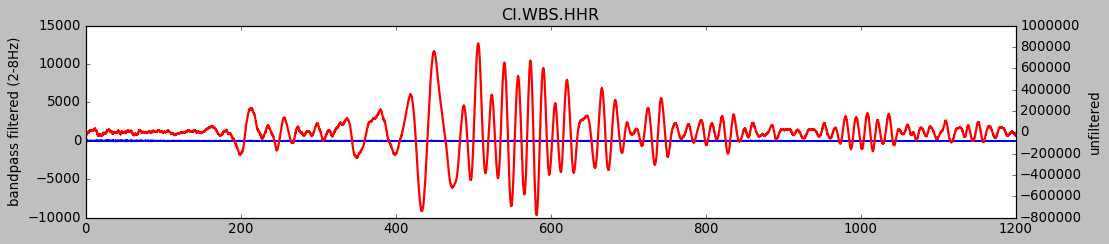

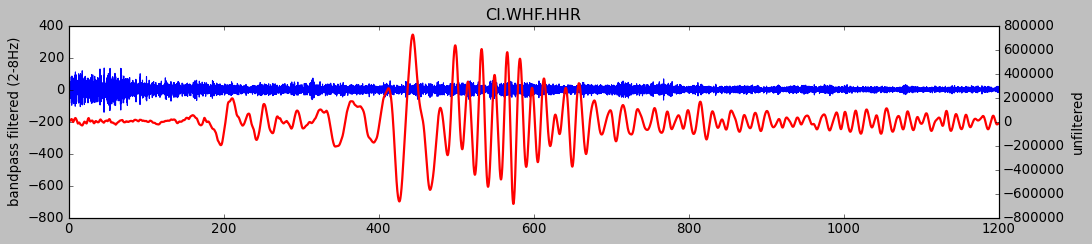

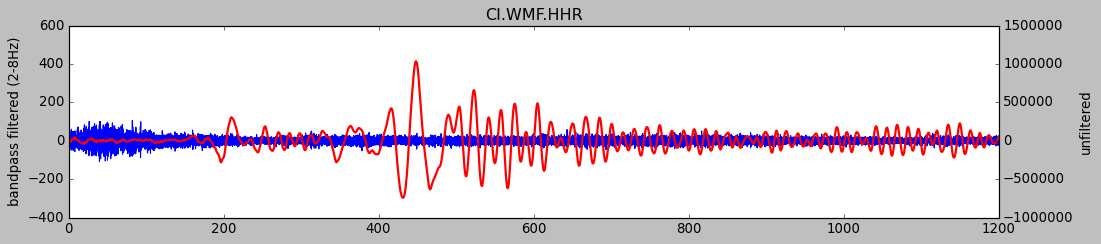

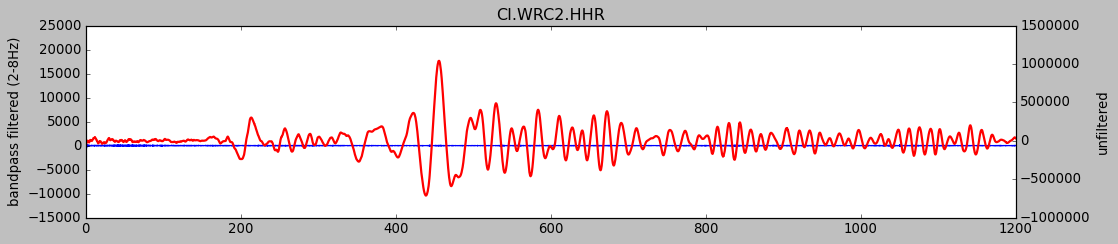

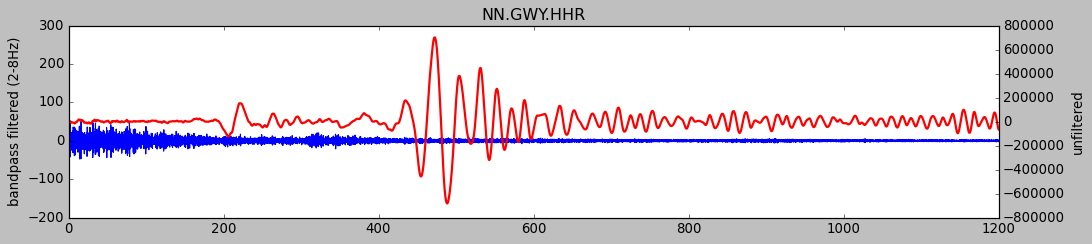

In [38]:
plt.style.use('classic')
for i in range(len(s_r)):
    fig = plt.figure(figsize=[15,3])
    ax1 = fig.add_subplot(111)
    t = np.linspace(0,len(s_r[i].data)*s_r[i].stats.delta,len(s_r[i].data))
    ax1.plot(t,s_r_f[i].data)
    ax1.set_ylabel('bandpass filtered (2-8Hz)')
    #ax1.set_xlim(0,t[-1])
    ax2 = ax1.twinx()
    ax2.plot(t,s_r[i],'r-',label='unfiltered',LineWidth=2)
    ax2.set_ylabel('unfiltered')
    ax2.set_xlim(0,1200)
    plt.title(s_r[i].stats.network+'.'+s_r[i].stats.station+'.'+s_r[i].stats.channel)

## Ok so there is no clear evidence of triggered seismicity at any station, we can still see some tremor like arrivals at some stations. we will investigate these stations in more details

In [39]:
for i in range(len(stn_lats)):
    s_t[i].stats.distance = dist[i]
    s_t[i].stats.latitude = stn_lats[i]
    s_t[i].stats.longitude = stn_lons[i]
    s_r[i].stats.distance = dist[i]
    s_r[i].stats.latitude = stn_lats[i]
    s_r[i].stats.longitude = stn_lons[i]

In [40]:
s_t_good = []
s_r_good = []
s_t_f_good = []
s_r_f_good = []

sta_list = ['DAW','CCC','WOR','POR']
for sta in sta_list:
    s_t_good += s_t.select(station=sta)
    s_r_good += s_r.select(station=sta)
    s_t_f_good += s_t_f.select(station=sta)
    s_r_f_good += s_r_f.select(station=sta)
    
s_t_good = obspy.Stream(s_t_good)
s_r_good = obspy.Stream(s_r_good)
s_t_f_good = obspy.Stream(s_t_f_good)
s_r_f_good = obspy.Stream(s_r_f_good)

In [41]:
stn_lats_good = []
stn_lons_good = []
for i in range(len(s_t_good)):
    stn_lats_good.append(s_t_good[i].stats.latitude)
    stn_lons_good.append(s_t_good[i].stats.longitude)

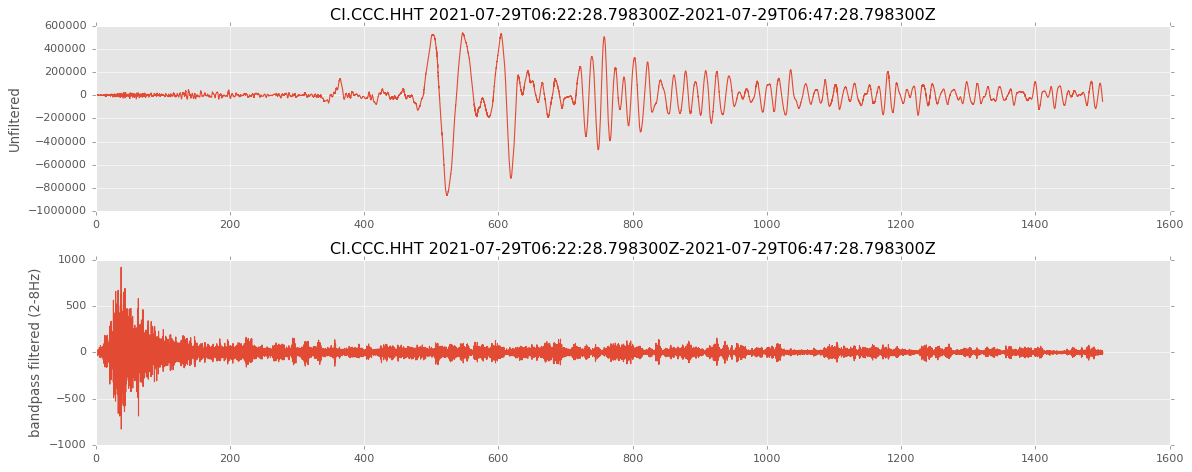

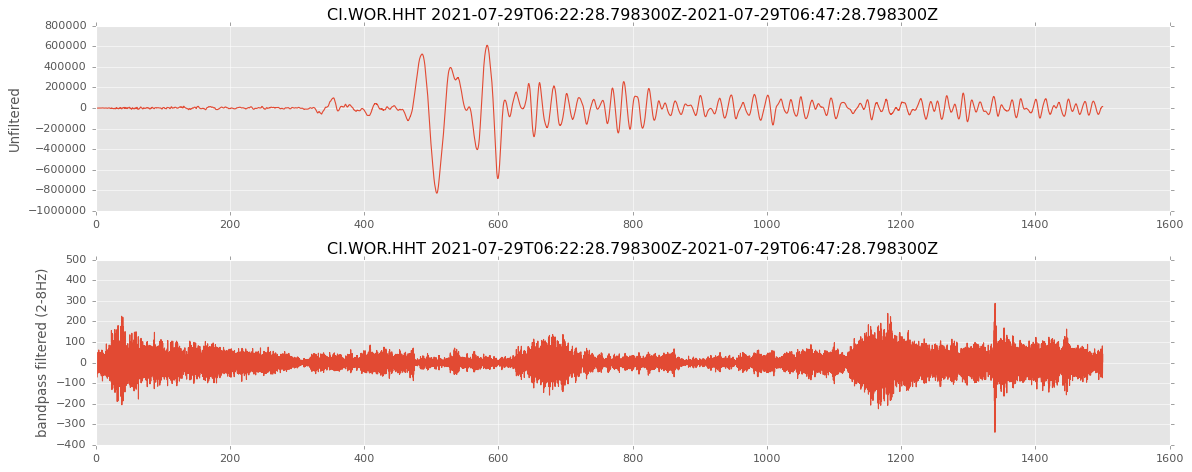

In [42]:
plt.style.use('ggplot')
for i in range(len(s_t_f_good)):
    fig,ax1 = plt.subplots(2,1,figsize=[15,6])
    t = np.linspace(0,len(s_t_f_good[i].data)*s_t_f_good[i].stats.delta,len(s_t_f_good[i].data))
    #ax1.set_xlim(t[np.argmax(s_n_f[i].data[500:-1])]-200,t[np.argmax(s_n_f[i].data[500:-1])]+200)
    #ax1[1].set_xlim(500,1200)
    ax1[1].plot(t,s_t_f_good[i].data)
    ax1[1].set_ylabel('bandpass filtered (2-8Hz)')
    ax1[1].set_title(s_t_f_good[i].stats.network+'.'+s_t_f_good[i].stats.station+'.'+s_t_f_good[i].stats.channel+' '+
             str(s_t_f_good[i].stats.starttime)+'-'+str(s_t_f_good[i].stats.endtime))
    #ax1[0].set_xlim(500,1200)
    ax1[0].plot(t,s_t_good[i].data)
    ax1[0].set_ylabel('Unfiltered')
    ax1[0].set_title(s_t_good[i].stats.network+'.'+s_t_good[i].stats.station+'.'+s_t_good[i].stats.channel+' '+
             str(s_t_good[i].stats.starttime)+'-'+str(s_t_good[i].stats.endtime))
    fig.tight_layout()

### No consistent triggered earthquake waveforms is observed at above stations

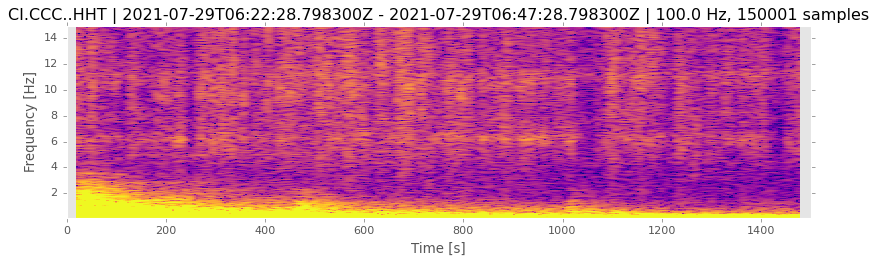

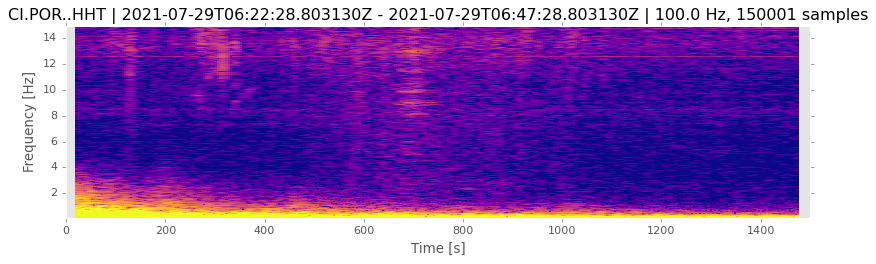

In [43]:
for i in range(len(s_t_good)):
    plt.rcParams['figure.figsize'] = 12,3
    fig = s_t_good[i].spectrogram(show=False,wlen=50,dbscale=True,cmap='plasma')
    ax = fig.axes[0]
    ax.set_ylim(0.1,15)
    #ax.set_xlim(400,800)
    im = ax.images[0]
    im.set_clim(vmin=-10,vmax=50)

### Again the spectrogram did not provide any clear picture either. The triggered events, if present, are not strong enough to appear. 

In [6]:
from obspy import UTCDateTime
t1 = UTCDateTime("2021-07-29T05:00:00")
client = Client('IRIS')
cat = client.get_events(starttime=t1, endtime=t1+3*3600, minmagnitude=0,latitude=lat,longitude=lon,minradius=0,maxradius=1)
cat1 = client.get_events(starttime=t1-12*3600, endtime=t1+12*3600, minmagnitude=0,latitude=lat,longitude=lon,minradius=0,maxradius=1)

In [8]:
print(cat1.__str__(print_all=True))

17 Event(s) in Catalog:
2021-07-29T16:29:10.240000Z | +35.736, -117.481 | 0.72 Ml
2021-07-29T16:05:37.040000Z | +35.678, -117.552 | 0.91 Ml
2021-07-29T16:02:35.540000Z | +35.746, -117.538 | 0.27 Ml
2021-07-29T15:25:04.190000Z | +35.899, -117.743 | 0.08 Ml
2021-07-29T15:05:24.240000Z | +35.597, -117.605 | 0.99 Ml
2021-07-29T14:32:30.470000Z | +35.910, -117.753 | 0.58 Ml
2021-07-29T12:41:24.390000Z | +36.469, -117.964 | 1.82 Ml
2021-07-29T12:06:09.120000Z | +35.882, -117.701 | 1.19 Ml
2021-07-29T11:10:50.120000Z | +35.891, -117.684 | 0.99 Ml
2021-07-29T05:32:45.300000Z | +35.668, -117.472 | 1.94 Ml
2021-07-29T03:01:51.100000Z | +35.835, -117.665 | 0.63 Ml
2021-07-29T00:22:27.450000Z | +36.137, -117.828 | 1.8 Ml
2021-07-28T22:27:39.670000Z | +35.869, -117.647 | 0.79 Ml
2021-07-28T21:20:02.880000Z | +35.649, -117.423 | 0.82 Ml
2021-07-28T21:19:15.130000Z | +35.650, -117.549 | 0.18 Ml
2021-07-28T18:06:19.480000Z | +35.866, -117.698 | 0.98 Ml
2021-07-28T17:56:35.150000Z | +35.586, -117.504 |

In [9]:
import matplotlib.dates as mdates
ev_lats = []
ev_lons = []
ev_depths = []
mags_1 = []
times = []
for event in cat:
    ev_lats.append(event.origins[0].latitude)
    ev_lons.append(event.origins[0].longitude)
    ev_depths.append(event.origins[0].depth)
    mags_1.append(event.magnitudes[0].mag)
    times.append(event.origins[0].time)
mags_1 = np.array(mags_1)
ev_depths = np.array(ev_depths)
times = mdates.date2num(times)

In [10]:
times = []
mags =[]
for event in cat1:
    times.append(event.origins[0].time)
    mags.append(event.magnitudes[0].mag)

In [11]:
import matplotlib.dates as mdates
mtimes = mdates.date2num(times)
ev_o_time = UTCDateTime(2021,7,29,6,15,0)
mtimes1 = mdates.date2num(ev_o_time)

In [12]:
plt.style.use('seaborn')
fig1 = plt.subplots(1,1,figsize=[12,3])
plt.plot_date(mtimes,mags,marker='.',MarkerSize=10)
plt.xlabel('Time(s)')
plt.ylabel('Magnitude')
plt.axvline(mtimes1,color='r',label='M8.2 Chignik earthquake')
plt.legend()
plt.title('Seismicity near Geysers')

Text(0.5, 1.0, 'Seismicity near Geysers')

In [13]:
from numpy import math
from math import factorial as fact
mean = len(cat1)/24 ## No. of earthquakes per hour
e = 2.718
p = []
for i in range(10):
    p.append(((mean)**(i))*(e**(-mean))/fact(i))


Text(0.5, 0, 'Number of events in the given hour')

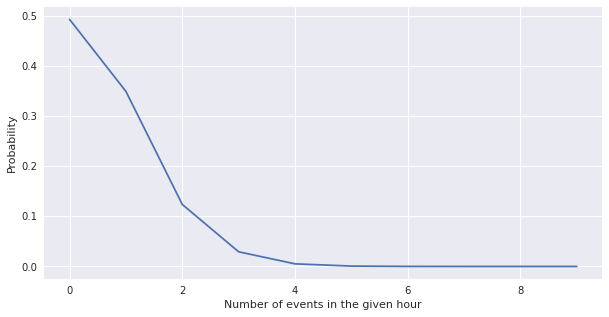

In [15]:
plt.figure(figsize=[10,5])
plt.plot(p)
plt.ylabel('Probability')
plt.xlabel('Number of events in the given hour')
#plt.ylim(0,0.01)

### There is not any clear evidence of triggered seismicity near Coso volcanic field. As there are no consistent observations around the time of arrival of surface waves.